In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd
import re

# plot style
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})

In [74]:
code_files = [
    ["text/x-c","C++ Source"],
    ["text/css","Cascading Style Sheet"],
    ["text/javascript","Javascript Code"],
    ["application/javascript","Javascript Code"],
    ["application/x-javascript","Javascript Code"],
    ["text/x-matlab","MATLAB Source Code"],
    ["text/x-mathematica","Mathematica Input"],
    ["text/php","PHP Source Code"],
    ["text/x-python","Python Source Code"],
    ["text/x-python-script","Python Source Code"],
    ["text/x-r-source","R Source Code"],
    ["application/x-sh","Shell Script"],
    ["application/x-shellscript","Shell Script"],
    ["application/x-sql","SQL Code"],
    ["text/x-sql","SQL Code"],
    ["application/x-swc","Shockwave Flash Component"],
    ["application/x-msdownload","Windows Executable"],
    ["application/x-ipynb+json","Jupyter Notebook"],
    ["application/x-stata-ado","Stata Ado Script"],
    ["application/x-stata-do","Stata Do Script"],
    ["application/x-stata-dta","Stata Data Script"],
    ["application/x-stata-smcl","Stata Markup and Control Language"],
    ["text/x-stata-syntax","Stata Syntax"],
    ["application/x-stata-syntax","Stata Syntax"],
    ["text/x-spss-syntax","SPSS Syntax"],
    ["application/x-spss-syntax","SPSS Syntax"],
    ["application/x-spss-sps","SPSS Script Syntax"],
    ["text/x-sas-syntax","SAS Syntax"],
    ["application/x-sas-syntax","SAS Syntax"],
    ["type/x-r-syntax","R Syntax"]
]

In [75]:
df = pd.DataFrame(code_files, columns=['mime', 'name'])

In [76]:
frequencies = [
    [103599,"text/tab-separated-values"],
    [63471,"text/plain"],
    [54389,"application/pdf"],
    [51189,"application/octet-stream"],
    [50958,"application/dicom"],
    [39883,"text/plain"],
    [38106,"image/tiff"],
    [36811,"image/jpeg"],
    [28316,"application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"],
    [23427,"text/x-fixed-field"],
    [20585,"application/matlab-mat"],
    [19845,"text/csv"],
    [17361,"application/zip"],
    [16088,"application/x-stata-syntax"],
    [14498,"image/png"],
    [12539,"application/x-gzip"],
    [12528,"application/x-xz"],
    [12036,"application/vnd.ms-excel"],
    [11999,"image/fits"],
    [11986,"type/x-r-syntax"],
    [9021,"application/fits"],
    [8625,"application/msword"],
    [8231,"application/vnd.openxmlformats-officedocument.wordprocessingml.document"],
    [7836,"application/x-netcdf"],
    [5236,"application/gzip"],
    [5156,"image/dicom-rle"],
    [4422,"application/x-stata"],
    [4418,"text/xml"],
    [4155,"application/zipped-shapefile"],
    [3559,"audio/x-wav"],
    [3463,"text/x-stata-syntax"],
    [3220,"application/x-rlang-transport"],
    [3012,"text/html"],
    [2812,"text/turtle"],
    [2803,"application/netcdf"],
    [2794,"application/vnd.isac.fcs"],
    [2723,"application/json"],
    [2421,"text/xml-graphml"],
    [2315,"chemical/x-xyz"],
    [2079,"text/tsv"],
    [2024,"application/x-h5"],
    [1969,"audio/x-wave"],
    [1846,"audio/wav"],
    [1832,"application/x-tex"],
    [1821,"image/nii"],
    [1654,"text/x-matlab"],
    [1568,"application/x-tar"],
    [1479,"video/mp4"],
    [1305,"text/x-spss-syntax"],
    [1272,"application/x-7z-compressed"],
    [1261,"application/vnd.ms-excel.sheet.macroenabled.12"],
    [1239,"text/plain"],
    [1015,"application/x-compressed-tar"],
    [975,"application/x-spss-por"],
    [944,"audio/ogg"],
    [905,"application/x-rar-compressed"],
    [854,"application/x-xfig"],
    [833,"image/bmp"],
    [833,"application/postscript"],
    [732,"application/vnd.flographit"],
    [653,"application/dbf"],
    [651,"application/warc"],
    [566,"text/x-python"],
    [518,"application/x-stata-13"],
    [504,"application/shp"],
    [480,"application/x-spss-sav"],
    [476,"application/cnt"],
    [467,"application/shx"],
    [457,"application/rtf"],
    [456,"text/x-stata-syntax"],
    [443,"application/x-spss-syntax"],
    [438,"application/x-bzip"],
    [422,"application/vnd.openxmlformats-officedocument.presentationml.presentation"],
    [399,"image/gif"],
    [391,"text/comma-separated-values"],
    [380,"application/rar"],
    [371,"text/markdown"],
    [354,"video/avi"],
    [348,"application/x-sas-system"],
    [321,"text/x-spss-syntax"],
    [321,"text/x-sas-syntax"],
    [315,"application/x-sas-syntax"],
    [299,"text/rtf"],
    [297,"video/quicktime"],
    [283,"image/jp2"],
    [278,"text/x-r-source"],
    [271,"application/x-stata-smcl"],
    [266,"application/x-zip-compressed"],
    [260,"application/x-stata-14"],
    [255,"application/x-hdf5"],
    [252,"text/x-c"],
    [240,"application/sbx"],
    [240,"application/sbn"],
    [235,"video/x-msvideo"],
    [231,"text/x-python-script"],
    [225,"application/x-sql"],
    [192,"application/x-tgif"],
    [190,"application/x-ipynb+json"],
    [190,"application/vnd.ms-pki.stl"],
    [186,"text/x-pascal"],
    [181,"text/x-vcard"],
    [165,"audio/mpeg"],
    [164,"application/x-stata-ado"],
    [163,"text/x-fortran"],
    [155,"application/x-sas-data"],
    [151,"application/x-hdf"],
    [125,"application/x-bzip2"],
    [123,"application/x-sh"],
    [119,"audio/mp3"],
    [114,"application/vnd.oasis.opendocument.spreadsheet"],
    [113,"application/x-sas"],
    [104,"application/javascript"],
    [100,"application/vnd.antix.game-component"],
    [91,"application/vnd.ms-powerpoint"],
    [89,"application/vnd.lotus-notes"],
    [76,"application/x-msdownload"],
    [75,"application/mathematica"],
    [71,"application/prj"],
    [70,"image/svg+xml"],
    [67,"image/RAW"],
    [64,"text/css"],
    [61,"application/vnd.ms-excel.sheet.macroEnabled.12"],
    [60,"text/vnd.fmi.flexstor"],
    [59,"application/x-sas-catalog"],
    [57,"application/x-matlab-workspace"],
    [54,"text/x-sas-syntax"],
    [54,"application/vnd.google-earth.kmz"],
    [49,"application/x-swc"],
    [44,"application/x-matlab-figure"],
    [43,"application/vnd.wolfram.mathematica.package"],
    [43,"application/vnd.oasis.opendocument.chart"],
    [42,"text/x-java-source"],
    [42,"application/x-shellscript"],
    [40,"text/x-sh"],
    [40,"application/softgrid-do"],
    [40,"application/download"],
    [36,"application/winhlp"],
    [34,"application/vnd.realvnc.bed"],
    [33,"audio/x-aiff"],
    [31,"application/x-research-info-systems"],
    [31,"application/msaccess"],
    [30,"application/vnd.tcpdump.pcap"],
    [29,"application/x-rar"],
    [29,"application/java-vm"],
    [28,"text/x-spss-syntax"],
    [27,"application/x-iwork-keynote-sffkey"],
    [27,"application/x-compressed"],
    [27,"application/gml+xml"],
    [26,"application/x-r-data"],
    [25,"application/photoshop"],
    [24,"video/webm"],
    [24,"application/vnd.palm"],
    [24,"application/vnd.ms-cab-compressed"],
    [23,"application/macbinary"],
    [22,"text/x-markdown"],
    [21,"text/x-log"],
    [21,"application/x-javascript"],
    [20,"application/x-photoshop"],
    [20,"application/x-msaccess"],
    [20,"application/rat-file"],
    [19,"video/mpeg"],
    [19,"text/php"],
    [19,"audio/x-ape"],
    [19,"application/x-graphpad-prism-pzfx"],
    [18,"video/x-m4v"],
    [18,"application/x-download"],
    [18,"application/vnd.oasis.opendocument.text"],
    [17,"text/x-objcsrc"],
    [17,"application/vnd.ms-excel.sheet.binary.macroenabled.12"],
    [17,"application/vnd.google-earth.kml+xml"],
    [16,"application/x-wais-source"],
    [15,"application/x-sas-transport"],
    [15,"application/x-iwork-keynote-sffnumbers"],
    [15,"application/x-font-ttf"],
    [15,"application/nappdf"],
    [15,"application/java-serialized-object"],
    [14,"application/x-sas-log"],
    [14,"application/x-ms-shortcut"],
    [14,"application/x-esri-shape"],
    [13,"application/vnd.dna"],
    [12,"text/vcard"],
    [12,"application/x-graphpad-prism-pzf"],
    [12,"application/x-font-type1"],
    [12,"application/vnd.wolfram.mathematica"],
    [12,"application/vnd.actelion.dwar"],
    [11,"text/x-stata-syntax"],
    [11,"image/vnd.fst"],
    [11,"audio/x-m4a"],
    [11,"application/x-pkcs7-certificates"],
    [11,"application/vnd.ms-word.document.12"],
    [11,"application/tar"],
    [10,"video/x-smv"],
    [10,"text/x-r-markdown"],
    [10,"application/x-debian-package"],
    [9,"video/x-ms-wmv"],
    [9,"text/x-tex"],
    [9,"text/javascript"],
    [9,"application/x-webarchive"],
    [9,"application/java-archive"],
    [8,"image/x-pict"],
    [8,"chemical/seq-na-genbank"],
    [8,"application/x-sas-output"],
    [8,"application/x-pdf"],
    [8,"application/x-noteexpress-tagged"],
    [8,"application/x-msmetafile"],
    [8,"application/vnd.wolfram.nb"],
    [8,"application/vnd.wm.igor.pxp"],
    [8,"application/vnd.ms-excel.sheet.binary.macroEnabled.12"],
    [8,"application/>octet-stream"],
    [7,"text/x-comma-separated-values"],
    [7,"binary/octet-stream"],
    [7,"application/xml"],
    [7,"application/x-jmp-data"],
    [7,"application/x-director"],
    [7,"application/x-dbf"],
    [7,"application/x-dbase"],
    [7,"application/rdf+xml"],
    [6,"text/x-perl-script"],
    [6,"text/pdf"],
    [6,"chemical/x-cif"],
    [6,"biosequence/fasta"],
    [6,"audio/vnd.wave"],
    [6,"application/vnd.epson.msf"],
    [6,"application/vnd.dynageo"],
    [5,"text/x-sql"],
    [5,"audio/x-ms-wma"],
    [5,"application/x-wine-extension-do"],
    [5,"application/x-spss-sps"],
    [5,"application/x-emf"],
    [5,"application/vnd.yellowriver-custom-menu"],
    [5,"application/vnd.snapgene.dna"],
    [5,"application/softgrid-inp"],
    [5,"application/pics-rules"],
    [4,"text/richtext"],
    [4,"image/pdf"],
    [4,"chemical/x-molfile"],
    [4,"application/x-stata-do"],
    [4,"application/x-lzh-compressed"],
    [4,"application/x-dna"],
    [4,"application/vnd.sun.xml.calc.template"],
    [4,"application/text-plain:formatted"],
    [4,"application/softgrid-7z"],
    [4,"application/docx"],
    [3,"text/x-sfv"],
    [3,"text/x-bibtex"],
    [3,"application/x-stuffit"],
    [3,"application/x-stata-dta"],
    [3,"application/x-octet-stream"],
    [3,"application/x-iwork-numbers-sffnumbers"],
    [3,"application/x-gzip-compressed"],
    [3,"application/x-desktop"],
    [3,"application/x-csh"],
    [3,"application/x-chimera"],
    [3,"application/vnd.openxmlformats-officedocument.word"],
    [3,"application/vnd.openxmlformats-officedocument.presentationml.slideshow"],
    [3,"application/vnd.mcd"],
    [3,"application/softgrid-sps"],
    [3,"application/haansoftdocx"],
    [3,"application/force-download"],
    [2,"video/mp2t"],
    [2,"text/x-troff-me"],
    [2,"text/vnd.graphviz"],
    [2,"text/unknown"],
    [2,"image/vnd.adobe.photoshop"],
    [2,"document/unknown"],
    [2,"audio/x-sd2"],
    [2,"audio/mp4"],
    [2,"application/x-tcl"],
    [2,"application/x-ms-dos-executable"],
    [2,"application/x-iwork-pages-sffpages"],
    [2,"application/xhtml+xml"],
    [2,"application/x-font-snf"],
    [2,"application/x-endnote-library-archive"],
    [2,"application/x-dtbresource+xml"],
    [2,"application/wordperfect"],
    [2,"application/vnd.wolfram.cdf"],
    [2,"application/vnd.rar"],
    [2,"application/vnd.openxmlformats-officedocument.spreadsheetml.template"],
    [2,"application/vnd.ms-publisher"],
    [2,"application/vnd.chipnuts.karaoke-mmd"],
    [2,"application/text"],
    [2,"application/nc"],
    [2,"application/KaluzaAnalysis"],
    [2,"application/DBF"],
    [1,"unknown/unknown"],
    [1,"text/x-rst"],
    [1,"text/x-qml"],
    [1,"text/x-ms-regedit"],
    [1,"text/x-moz-deleted"],
    [1,"text/x-c++src"],
    [1,"text/x-chdr"],
    [1,"text/x-asm"],
    [1,"text/troff"],
    [1,"text/spss"],
    [1,"text/nlogo"],
    [1,"text/calendar"],
    [1,"model/x.stl-binary"],
    [1,"model/vrml"],
    [1,"message/rfc822"],
    [1,"image/x-tga"],
    [1,"image/x-portable-graymap"],
    [1,"image/x-pcx"],
    [1,"image/x-icon"],
    [1,"image/vnd.dxf"],
    [1,"image/vnd.djvu"],
    [1,"image/ipeg"],
    [1,"chemical/x-fastq"],
    [1,"audio/mid"],
    [1,"audio/audible"],
    [1,"applicaton/octet-stream"],
    [1,"application/zstd"],
    [1,"application/x-yaml"],
    [1,"application/x-wtt"],
    [1,"application/x-wine-extension-ztt"],
    [1,"application/x-wine-extension-ztq"],
    [1,"application/x-virtualbox-ova"],
    [1,"application/x-shockwave-flash"],
    [1,"application/x-r-project"],
    [1,"application/x-qgis"],
    [1,"application/x-msword"],
    [1,"application/x-mspublisher"],
    [1,"application/xml-dtd"],
    [1,"application/x-latex"],
    [1,"application/x-iso9660-image"],
    [1,"application/x-compactpro"],
    [1,"application/x-bibtex"],
    [1,"application/x-apple-diskimage"],
    [1,"application/vnd.xmind.workbook"],
    [1,"application/vnd.wordperfect"],
    [1,"application/vnd.word"],
    [1,"application/vnd.stardivision.impress"],
    [1,"application/vnd.previewsystems.box"],
    [1,"application/vnd.openxmlformats"],
    [1,"application/vnd.oasis.opendocument.presentation"],
    [1,"application/vnd.ms-xpsdocument"],
    [1,"application/vnd.ms-word.document.macroenabled.12"],
    [1,"application/vnd.ms-word"],
    [1,"application/vnd.ms-powerpoint.presentation.macroEnabled.12"],
    [1,"application/vnd.ms-powerpoint.presentation.macroenabled.12"],
    [1,"application/vnd.ms-pdf"],
    [1,"application/vnd.ms-htmlhelp"],
    [1,"application/vnd.mif"],
    [1,"application/twbx"],
    [1,"application/twb"],
    [1,"application/softgrid-tex"],
    [1,"application/softgrid-rdata"],
    [1,"application/pkix-attr-cert"],
    [1,"application/pgp-signature"],
    [1,"application/ms-excel"],
    [1,"application/mex"],
    [1,"application/haansoftxls"],
    [1,"application/gpx+xml"],
    [1,"application/fits-gzipped"],
    [1,"application/attachment"]
]

In [77]:
results = pd.DataFrame(frequencies, columns=['count', 'mime'])

In [78]:
len(results)

354

In [79]:
merged = results.merge(df)

In [80]:
len(merged)

34

In [81]:
merged

,count,mime,name
0,16088,application/x-stata-syntax,Stata Syntax
1,11986,type/x-r-syntax,R Syntax
2,3463,text/x-stata-syntax,Stata Syntax
3,456,text/x-stata-syntax,Stata Syntax
4,11,text/x-stata-syntax,Stata Syntax
5,1654,text/x-matlab,MATLAB Source Code
6,1305,text/x-spss-syntax,SPSS Syntax
7,321,text/x-spss-syntax,SPSS Syntax
8,28,text/x-spss-syntax,SPSS Syntax
9,566,text/x-python,Python Source Code


In [105]:
def name_simplify(x):
    x = x.replace("Syntax","")
    x = x.replace("Source","")
    x = x.replace("Script","")
    x = x.replace("Code","")
    x = x.replace("Jupyter Notebook","Jupyter\nNotebook")
    return x.strip()

merged['simple_name'] = merged['name'].apply(name_simplify)

In [112]:
merged.head()

,count,mime,name,simple_name
0,16088,application/x-stata-syntax,Stata Syntax,Stata
1,11986,type/x-r-syntax,R Syntax,R
2,3463,text/x-stata-syntax,Stata Syntax,Stata
3,456,text/x-stata-syntax,Stata Syntax,Stata
4,11,text/x-stata-syntax,Stata Syntax,Stata


In [113]:
fin = merged.groupby("simple_name").sum().reset_index().sort_values(by="count", ascending=False).head(11)
fin

,simple_name,count
13,Stata,20018
7,R,12264
9,SPSS,2102
4,MATLAB,1654
6,Python,797
8,SAS,690
17,Stata Markup and Control Language,271
0,C++,252
10,SQL,230
3,Jupyter\nNotebook,190


In [108]:
fin = fin.drop([17]) # excluded as serves more as documentation

In [109]:
fin

,simple_name,count
13,Stata,20018
7,R,12264
9,SPSS,2102
4,MATLAB,1654
6,Python,797
8,SAS,690
0,C++,252
10,SQL,230
3,Jupyter\nNotebook,190
11,Shell,165


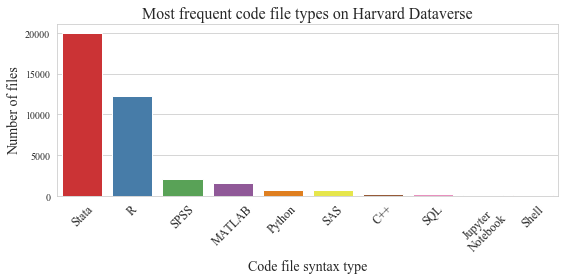

In [110]:
fig = plt.figure(figsize=(8,4))
ax = plt.subplot(111)
ax = sns.barplot(x='simple_name', y='count', palette="Set1", data=fin)
ax.set_title("Most frequent code file types on Harvard Dataverse", fontsize=16)
ax.set_xlabel("Code file syntax type",  fontsize=14)
ax.set_ylabel("Number of files",  fontsize=14)

#ax.set(xlabel='Sharing Mode')\n",
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig('file-hist.png', pdi=100)

## Counts from Nov 2019

```
nov_2019 = [
    [77167,"text/tab-separated-values"],
    [73659,"application/pdf"],
    [49427,"application/dicom"],
    [39369,"text/plain"],
    [37735,"text/plain"],
    [30552,"image/tiff"],
    [30200,"image/jpeg"],
    [30055,"application/octet-stream"],
    [26389,"application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"],
    [20444,"text/x-fixed-field"],
    [16101,"application/zip"],
    [15948,"text/csv"],
    [12448,"application/x-xz"],
    [11836,"image/fits"],
    [11485,"application/x-stata-syntax"],
    [9822,"application/vnd.ms-excel"],
    [9318,"image/png"],
    [8444,"application/msword"],
    [8291,"type/x-r-syntax"],
    [8184,"application/matlab-mat"],
    [7879,"application/fits"],
    [6765,"application/vnd.openxmlformats-officedocument.wordprocessingml.document"],
    [6085,"application/x-netcdf"],
    [5744,"application/x-gzip"],
    [5156,"image/dicom-rle"],
    [4298,"application/x-stata"],
    [4076,"text/xml"],
    [3842,"audio/x-wav"],
    [3464,"text/x-stata-syntax"],
    [2882,"application/x-rlang-transport"],
    [2812,"text/turtle"],
    [2803,"application/netcdf"],
    [2594,"text/html"],
    [2493,"application/gzip"],
    [2421,"text/xml-graphml"],
    [2315,"chemical/x-xyz"],
    [2311,"text/tsv"],
    [1969,"audio/x-wave"],
    [1458,"application/zipped-shapefile"],
    [1404,"image/nii"],
    [1381,"audio/wav"],
    [1356,"video/mp4"],
    [1305,"text/x-spss-syntax"],
    [1139,"application/x-7z-compressed"],
    [1046,"text/plain"],
    [1029,"application/vnd.ms-excel.sheet.macroenabled.12"],
    [1008,"application/x-compressed-tar"],
    [987,"application/x-tar"],
    [975,"application/x-spss-por"],
    [963,"application/x-h5"],
    [931,"audio/ogg"],
    [929,"application/json"],
    [799,"application/x-xfig"],
    [651,"application/warc"],
    [622,"application/vnd.isac.fcs"],
    [609,"application/x-tex"],
    [523,"application/dbf"],
    [509,"application/postscript"],
    [493,"application/x-stata-13"],
    [463,"application/x-spss-sav"],
    [425,"text/x-stata-syntax"],
    [412,"application/rtf"],
    [401,"text/x-matlab"],
    [396,"application/x-spss-syntax"],
    [391,"image/bmp"],
    [381,"application/shp"],
    [379,"application/rar"],
    [376,"application/vnd.flographit"],
    [371,"application/vnd.openxmlformats-officedocument.presentationml.presentation"],
    [354,"application/shx"],
    [323,"application/x-rar-compressed"],
    [321,"text/x-spss-syntax"],
    [321,"text/x-sas-syntax"],
    [317,"application/x-sas-system"],
    [283,"image/jp2"],
    [280,"image/gif"],
    [279,"application/x-sas-syntax"],
    [266,"video/quicktime"],
    [266,"application/x-zip-compressed"],
    [262,"application/x-bzip"],
    [242,"text/x-r-source"],
    [227,"video/x-msvideo"],
    [218,"text/rtf"],
    [202,"application/x-hdf5"],
    [192,"application/sbx"],
    [191,"application/sbn"],
    [181,"text/x-vcard"],
    [177,"text/markdown"],
    [168,"video/avi"],
    [168,"text/comma-separated-values"],
    [166,"text/x-python"],
    [165,"audio/mpeg"],
    [164,"text/x-python-script"],
    [162,"application/x-sql"],
    [128,"application/x-sas-data"],
    [123,"application/x-hdf"],
    [116,"audio/mp3"],
    [103,"application/javascript"],
    [102,"application/vnd.oasis.opendocument.spreadsheet"],
    [99,"application/vnd.lotus-notes"],
    [94,"application/x-bzip2"],
    [91,"application/x-stata-ado"],
    [90,"application/x-stata-smcl"],
    [90,"application/vnd.ms-powerpoint"],
    [84,"text/x-c"],
    [77,"application/x-sas"],
    [74,"application/x-stata-14"],
    [65,"application/x-sh"],
    [65,"application/mathematica"],
    [64,"application/vnd.antix.game-component"],
    [63,"text/css"],
    [59,"application/x-sas-catalog"],
    [57,"image/svg+xml"],
    [54,"application/x-matlab-workspace"],
    [53,"text/x-sas-syntax"],
    [49,"application/x-swc"],
    [48,"application/x-ipynb+json"],
    [46,"application/vnd.google-earth.kmz"],
    [45,"application/x-msdownload"],
    [44,"application/x-matlab-figure"],
    [43,"application/vnd.oasis.opendocument.chart"],
    [42,"application/x-shellscript"],
    [41,"application/vnd.ms-excel.sheet.macroEnabled.12"],
    [40,"application/download"],
    [36,"application/softgrid-do"],
    [33,"audio/x-aiff"],
    [31,"application/winhlp"],
    [30,"application/vnd.tcpdump.pcap"],
    [28,"text/x-spss-syntax"],
    [28,"application/msaccess"],
    [27,"application/prj"],
    [26,"application/vnd.wolfram.mathematica.package"],
    [25,"application/photoshop"],
    [24,"application/vnd.palm"],
    [24,"application/vnd.ms-cab-compressed"],
    [23,"image/RAW"],
    [23,"application/macbinary"],
    [22,"text/x-markdown"],
    [21,"application/x-javascript"],
    [20,"application/x-photoshop"],
    [20,"application/rat-file"],
    [19,"video/mpeg"],
    [19,"text/php"],
    [19,"audio/x-ape"],
    [19,"application/x-msaccess"],
    [19,"application/x-graphpad-prism-pzfx"],
    [18,"video/x-m4v"],
    [18,"text/x-log"],
    [18,"application/x-download"],
    [17,"application/x-compressed"],
    [17,"application/vnd.ms-excel.sheet.binary.macroenabled.12"],
    [16,"application/x-wais-source"],
    [16,"application/vnd.google-earth.kml+xml"],
    [15,"application/x-sas-transport"],
    [15,"application/x-iwork-keynote-sffnumbers"],
    [15,"application/nappdf"],
    [14,"text/x-objcsrc"],
    [14,"application/x-sas-log"],
    [14,"application/x-esri-shape"],
    [14,"application/vnd.oasis.opendocument.text"],
    [13,"application/gml+xml"],
    [12,"application/x-r-data"],
    [12,"application/x-graphpad-prism-pzf"],
    [12,"application/x-font-type1"],
    [11,"text/x-stata-syntax"],
    [11,"text/x-sh"],
    [11,"text/x-pascal"],
    [11,"text/vcard"],
    [11,"application/x-rar"],
    [11,"application/x-pkcs7-certificates"],
    [11,"application/vnd.wolfram.mathematica"],
    [11,"application/vnd.ms-word.document.12"],
    [11,"application/tar"],
    [10,"text/x-r-markdown"],
    [10,"application/x-font-ttf"],
    [9,"image/vnd.fst"],
    [9,"audio/x-m4a"],
    [9,"application/x-webarchive"],
    [9,"application/vnd.realvnc.bed"],
    [8,"text/javascript"],
    [8,"image/x-pict"],
    [8,"chemical/seq-na-genbank"],
    [8,"application/x-sas-output"],
    [8,"application/x-research-info-systems"],
    [8,"application/x-pdf"],
    [8,"application/x-noteexpress-tagged"],
    [8,"application/x-ms-shortcut"],
    [8,"application/x-msmetafile"],
    [8,"application/vnd.ms-pki.stl"],
    [8,"application/vnd.ms-excel.sheet.binary.macroEnabled.12"],
    [8,"application/>octet-stream"],
    [7,"text/x-comma-separated-values"],
    [7,"binary/octet-stream"],
    [7,"application/xml"],
    [7,"application/x-dbf"],
    [7,"application/rdf+xml"],
    [6,"text/pdf"],
    [6,"application/x-jmp-data"],
    [6,"application/vnd.wolfram.nb"],
    [6,"application/java-serialized-object"],
    [5,"text/x-tex"],
    [5,"text/x-sql"],
    [5,"audio/x-ms-wma"],
    [5,"application/x-wine-extension-do"],
    [5,"application/x-spss-sps"],
    [5,"application/x-emf"],
    [5,"application/vnd.yellowriver-custom-menu"],
    [5,"application/softgrid-inp"],
    [5,"application/pics-rules"],
    [4,"text/x-fortran"],
    [4,"text/richtext"],
    [4,"image/pdf"],
    [4,"chemical/x-molfile"],
    [4,"application/x-stata-do"],
    [4,"application/x-lzh-compressed"],
    [4,"application/x-dbase"],
    [4,"application/vnd.sun.xml.calc.template"],
    [4,"application/text-plain:formatted"],
    [4,"application/softgrid-7z"],
    [4,"application/docx"],
    [3,"video/x-ms-wmv"],
    [3,"text/x-perl-script"],
    [3,"application/x-stuffit"],
    [3,"application/x-stata-dta"],
    [3,"application/x-octet-stream"],
    [3,"application/x-chimera"],
    [3,"application/vnd.openxmlformats-officedocument.word"],
    [3,"application/vnd.dna"],
    [3,"application/softgrid-sps"],
    [3,"application/force-download"],
    [2,"video/mp2t"],
    [2,"text/x-java-source"],
    [2,"text/unknown"],
    [2,"document/unknown"],
    [2,"audio/x-sd2"],
    [2,"audio/mp4"],
    [2,"application/x-tcl"],
    [2,"application/x-ms-dos-executable"],
    [2,"application/x-iwork-keynote-sffkey"],
    [2,"application/xhtml+xml"],
    [2,"application/x-csh"],
    [2,"application/wordperfect"],
    [2,"application/vnd.wolfram.cdf"],
    [2,"application/vnd.rar"],
    [2,"application/vnd.openxmlformats-officedocument.spreadsheetml.template"],
    [2,"application/vnd.ms-publisher"],
    [2,"application/vnd.chipnuts.karaoke-mmd"],
    [2,"application/java-archive"],
    [2,"application/DBF,"Viewer,"2000"],
    [1,"unknown/unknown"],
    [1,"text/x-troff-me"],
    [1,"text/x-rst"],
    [1,"text/x-qml"],
    [1,"text/x-ms-regedit"],
    [1,"text/x-moz-deleted"],
    [1,"text/x-c++src"],
    [1,"text/x-chdr"],
    [1,"text/x-asm"],
    [1,"text/troff"],
    [1,"text/spss"],
    [1,"text/nlogo"],
    [1,"text/calendar"],
    [1,"model/vrml"],
    [1,"message/rfc822"],
    [1,"image/x-tga"],
    [1,"image/x-portable-graymap"],
    [1,"image/x-pcx"],
    [1,"image/x-icon"],
    [1,"image/vnd.djvu"],
    [1,"image/vnd.adobe.photoshop"],
    [1,"image/ipeg"],
    [1,"chemical/x-fastq"],
    [1,"chemical/x-cif"],
    [1,"audio/mid"],
    [1,"audio/audible"],
    [1,"applicaton/octet-stream"],
    [1,"application/x-yaml"],
    [1,"application/x-wtt"],
    [1,"application/x-wine-extension-ztt"],
    [1,"application/x-wine-extension-ztq"],
    [1,"application/x-virtualbox-ova"],
    [1,"application/x-shockwave-flash"],
    [1,"application/x-r-project"],
    [1,"application/x-qgis"],
    [1,"application/x-msword"],
    [1,"application/x-mspublisher"],
    [1,"application/xml-dtd"],
    [1,"application/x-iwork-pages-sffpages"],
    [1,"application/x-iwork-numbers-sffnumbers"],
    [1,"application/x-iso9660-image"],
    [1,"application/x-gzip-compressed"],
    [1,"application/x-director"],
    [1,"application/x-compactpro"],
    [1,"application/x-apple-diskimage"],
    [1,"application/vnd.xmind.workbook"],
    [1,"application/vnd.wordperfect"],
    [1,"application/vnd.word"],
    [1,"application/vnd.stardivision.impress"],
    [1,"application/vnd.snapgene.dna"],
    [1,"application/vnd.previewsystems.box"],
    [1,"application/vnd.openxmlformats-officedocument.presentationml.slideshow"],
    [1,"application/vnd.openxmlformats"],
    [1,"application/vnd.oasis.opendocument.presentation"],
    [1,"application/vnd.ms-xpsdocument"],
    [1,"application/vnd.ms-word"],
    [1,"application/vnd.ms-powerpoint.presentation.macroEnabled.12"],
    [1,"application/vnd.ms-powerpoint.presentation.macroenabled.12"],
    [1,"application/vnd.ms-pdf"],
    [1,"application/vnd.mif"],
    [1,"application/twbx"],
    [1,"application/softgrid-tex"],
    [1,"application/pkix-attr-cert"],
    [1,"application/pgp-signature"],
    [1,"application/ms-excel"],
    [1,"application/haansoftxls"],
    [1,"application/fits-gzipped"],
    [1,"application/cnt"],
    [1,"application/attachment"]
]
```